In [1]:
from GAME.utils.config import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from GAME.utils.helper_funcs import *
from scipy.stats import wilcoxon, ranksums
import copy

config_data = config()
trials = 10

#### Keepaway

##### GAME

In [41]:
results_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve keepaway Maps with GAME 2000 FE One-pt CX 0.043 Mutation MSE')
comparisons = []
fitness_evaluations = []
GAME_comparisons_avg = []
GAME_fitness_eval_avg = []
GAME_best_fitness = []
for trial in range(trials):
    comparisons = []
    fitness_evaluations = []
    trial_stats = os.path.join(results_folder_path, 'trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
    best_fitness = max(trial_df['best_fitness'])
    GAME_best_fitness.append(best_fitness)
    for _, row in trial_df.iterrows():
        if row['best_fitness'] < best_fitness:
            fitness_evaluations.append(row['fitness_evaluations'])
            comparisons.append(row['comparisons'])
        else:
            break
    GAME_comparisons_avg.append(sum(comparisons))
    GAME_fitness_eval_avg.append(fitness_evaluations[-1])

In [35]:
np.mean(GAME_comparisons_avg)

204122.0

##### GAME-RMHC

In [42]:
results_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve keepaway Maps with GAME-RMHC 2000 FE MSE')
comparisons = []
fitness_evaluations = []
GAMERMHC_comparisons_avg = []
GAMERMHC_fitness_eval_avg = []
GAMERMHC_best_fitness = []
for trial in range(trials):
    comparisons = []
    fitness_evaluations = []
    trial_stats = os.path.join(results_folder_path, 'trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
    best_fitness = max(trial_df['best_fitness'])
    GAMERMHC_best_fitness.append(best_fitness)    
    for _, row in trial_df.iterrows():
        if row['best_fitness'] < best_fitness:
            fitness_evaluations.append(row['fitness_evaluations'])
            comparisons.append(row['comparisons'])
        else:
            break
    GAMERMHC_comparisons_avg.append(sum(comparisons))
    GAMERMHC_fitness_eval_avg.append(fitness_evaluations[-1])

In [39]:
np.mean(GAMERMHC_fitness_eval_avg)

1783.9

#### Statistical Tests

In [43]:
GAME_best_fitness

[0.9987452780124598,
 0.9987504690559096,
 0.9988200668439944,
 0.9988480603999697,
 0.9988622892868468,
 0.9988436153984126,
 0.9987677152267914,
 0.9986646294194363,
 0.9986226709744292,
 0.9986699787057264]

In [44]:
GAMERMHC_best_fitness

[0.9989226894527764,
 0.9989179213021916,
 0.9990878753907178,
 0.998940324852284,
 0.9990393450627442,
 0.999107711067322,
 0.9989716707440875,
 0.998798887599356,
 0.9990263316568658,
 0.9990984588763284]

In [45]:
d = [samp1 - samp2 for samp1, samp2 in zip(GAMERMHC_best_fitness, GAME_best_fitness)]
# res = wilcoxon(d)
# res.pvalue
ranksums(GAMERMHC_best_fitness, GAME_best_fitness, alternative='greater')

RanksumsResult(statistic=3.4772731516848907, pvalue=0.000253270742346145)

In [23]:
res = wilcoxon(d, alternative='greater')
res.pvalue

0.0009765625

In [4]:
GAME_comparisons_avg

[78245, 24880, 59141, 75560, 64251, 73450, 71116, 42142, 65719, 69884]

In [5]:
GAMERMHC_comparisons_avg

[3682, 3572, 3920, 3218, 3966, 3686, 3482, 2336, 3268, 2420]

In [6]:
d = [samp1 - samp2 for samp1, samp2 in zip(GAME_comparisons_avg, GAMERMHC_comparisons_avg)]
res = wilcoxon(d)
res.pvalue

0.001953125

In [7]:
res = wilcoxon(d, alternative='greater')
res.pvalue

0.0009765625

In [8]:
ranksums(GAME_comparisons_avg, GAMERMHC_comparisons_avg, alternative='greater')

RanksumsResult(statistic=3.779644730092272, pvalue=7.852614211537559e-05)

In [9]:
GAME_fitness_eval_avg

[1797, 602, 1373, 1776, 1507, 1714, 1648, 1012, 1551, 1610]

In [10]:
GAMERMHC_fitness_eval_avg

[1841, 1786, 1960, 1609, 1983, 1843, 1741, 1168, 1634, 1210]

In [11]:
d = [samp1 - samp2 for samp1, samp2 in zip(GAME_fitness_eval_avg, GAMERMHC_fitness_eval_avg)]
res = wilcoxon(d)
res.pvalue

0.16015625

In [13]:
res = wilcoxon(d, alternative='less')
res.pvalue

0.080078125

In [15]:
ranksums(GAME_fitness_eval_avg, GAMERMHC_fitness_eval_avg, alternative='two-sided')

RanksumsResult(statistic=-1.6630436812405998, pvalue=0.09630369202868826)

#### Mountain Car

##### GAME

In [2]:
results_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve MC Maps with GAME 240 FE')
comparisons = []
fitness_evaluations = []
GAME_comparisons_avg = []
GAME_fitness_eval_avg = []
GAME_best_fitness = []
for trial in range(trials):
    comparisons = []
    fitness_evaluations = []
    trial_stats = os.path.join(results_folder_path, 'MC_trial{}_stats.txt'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
    best_fitness = max(trial_df['best_fitness'])
    GAME_best_fitness.append(best_fitness)
    for _, row in trial_df.iterrows():
        if row['best_fitness'] < best_fitness:
            fitness_evaluations.append(row['fitness_evaluations'])
            comparisons.append(row['comparisons'])
        else:
            break
    GAME_comparisons_avg.append(sum(comparisons))
    GAME_fitness_eval_avg.append(fitness_evaluations[-1])

In [26]:
GAME_comparisons_avg

[440.0,
 92397.0,
 13246.0,
 4081.0,
 1709.0,
 2776.0,
 10843.0,
 6185.0,
 11574.0,
 4105.0]

In [28]:
np.mean(GAME_fitness_eval_avg)

145.4

##### GAME-RMHC

In [29]:
results_folder_path = os.path.join(config_data['output_path'], '01072023 Evolve MC Maps with GAME-RMHC 240 FE')
comparisons = []
fitness_evaluations = []
GAMERMHC_comparisons_avg = []
GAMERMHC_fitness_eval_avg = []
GAMERMHC_best_fitness = []
for trial in range(trials):
    comparisons = []
    fitness_evaluations = []
    trial_stats = os.path.join(results_folder_path, 'trial{}_stats.csv'.format(trial))
    trial_df = pd.read_csv(trial_stats, index_col=False, header=0)
    best_fitness = max(trial_df['best_fitness'])
    GAMERMHC_best_fitness.append(best_fitness)
    for _, row in trial_df.iterrows():
        if row['best_fitness'] < best_fitness:
            fitness_evaluations.append(row['fitness_evaluations'])
            comparisons.append(row['comparisons'])
        else:
            break
    GAMERMHC_comparisons_avg.append(sum(comparisons))
    GAMERMHC_fitness_eval_avg.append(fitness_evaluations[-1])

In [32]:
np.mean(GAMERMHC_comparisons_avg)

126.6

#### Statistical Test

In [13]:
GAME_comparisons_avg

[440.0,
 92397.0,
 13246.0,
 4081.0,
 1709.0,
 2776.0,
 10843.0,
 6185.0,
 11574.0,
 4105.0]

In [8]:
GAMERMHC_comparisons_avg

[3242, 3342, 3566, 3730, 3538, 3602, 3728, 3284, 3684, 3962]

In [4]:
d = [samp1 - samp2 for samp1, samp2 in zip(GAME_comparisons_avg, GAMERMHC_comparisons_avg)]
res = wilcoxon(d)
res.pvalue

0.001953125

In [10]:
res = wilcoxon(d, alternative='greater')
res.pvalue

0.0009765625

In [12]:
ranksums(GAME_comparisons_avg, GAMERMHC_comparisons_avg, alternative='greater')

RanksumsResult(statistic=3.779644730092272, pvalue=7.852614211537559e-05)

In [13]:
GAME_fitness_eval_avg

[40.0, 80.0, 101.0, 102.0, 172.0, 80.0, 82.0, 81.0, 112.0, 30.0]

In [14]:
GAMERMHC_fitness_eval_avg

[25.0, 50.0, 73.0, 79.0, 77.0, 102.0, 71.0, 100.0, 66.0, 34.0]

In [15]:
d = [samp1 - samp2 for samp1, samp2 in zip(GAME_fitness_eval_avg, GAMERMHC_fitness_eval_avg)]
res = wilcoxon(d)
res.pvalue

0.083984375

In [16]:
res = wilcoxon(d, alternative='greater')
res.pvalue

0.0419921875

In [13]:
ranksums(GAME_fitness_eval_avg, GAMERMHC_fitness_eval_avg, alternative='greater')

RanksumsResult(statistic=1.776433023143368, pvalue=0.03783078607194352)

## Transfer learning

##### Mountain Car

In [2]:
config_data = config()

In [3]:
def plot_MC(df, trials):
    output_X = []
    output_Y = []
    output_eps = []
    for trial in range(trials):
        df_by_trial = df[df['Trial'] == trial].reset_index(drop = True)
        trial_output_X, trial_output_Y, trial_output_eps = generate_MC_learning_curves(df_by_trial, 10, 0.01, 1)
        output_X.append(trial_output_X)
        output_Y.append(trial_output_Y)
        output_eps.append(trial_output_eps)

    avg_output_X = output_X[0]
    output_Y = np.array(output_Y)
    avg_output_Y = output_Y.mean(axis=0)

    return output_X, output_Y, output_eps, avg_output_X, avg_output_Y, output_eps[0]

In [4]:
MC3D_train_no_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', '11072022 MC3D No Transfer Consolidated')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_MC3D_no_transfer_a0.75_l0.99_e0.01_nt8.csv')
MC3D_train_no_transfer_folder_path = os.path.join(config_data['output_path'], '12152022 Train MC3D No Transfer')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0_nt8.csv')
MC3D_train_no_transfer_folder_path = os.path.join(config_data['output_path'], '01242023 Train MC3D No Transfer 30 Trials')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0_nt8.csv')
trials = 30
df = pd.read_csv(MC3D_train_no_transfer_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, trials)
MC3D_no_transfer_ttt = []
for trial in range(trials):
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= -1000:
            MC3D_no_transfer_ttt.append(all_output_eps[trial][dat_idx])
            break

In [76]:
MC3D_no_transfer_ttt

[458, 494, 534, 550, 561, 713, 515, 524, 400, 381]

In [5]:
np.mean(MC3D_no_transfer_ttt)

513.8666666666667

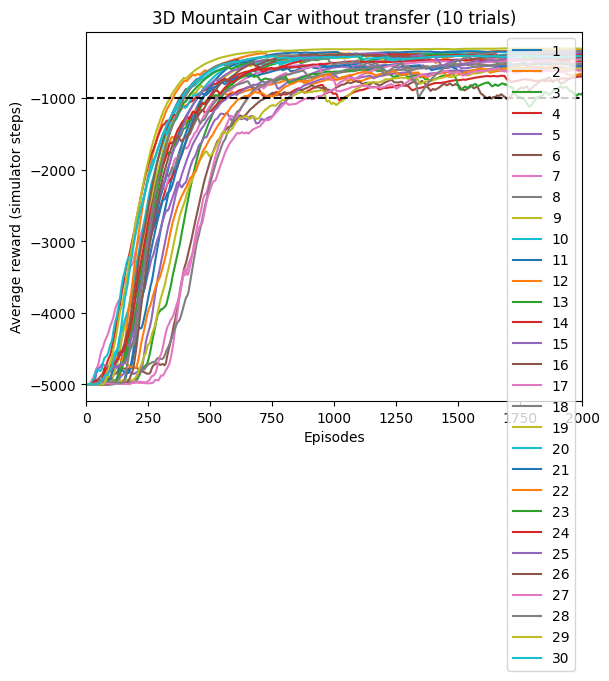

In [6]:
for trial in range(trials):
    plt.plot(all_output_X[trial], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 2000], [-1000, -1000], 'k--')
plt.xlim(0, 2000)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car without transfer (10 trials)')
plt.legend()

In [9]:
MC3D_train_transfer_handcoded_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', '11152022 Train MC3D With Transfer Mapping 010110202')
MC3D_train_transfer_handcoded_folder_path = os.path.join(config_data['output_path'], '01242023 Train MC3D With QValue Transfer Mapping 010110202 30 Trials')
MC3D_train_transfer_handcoded_filepath = os.path.join(MC3D_train_transfer_handcoded_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')
trials = 30
df = pd.read_csv(MC3D_train_transfer_handcoded_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, trials)
MC3D_transfer_handcoded_ttt = []
for trial in range(trials):
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= -1000:
            MC3D_transfer_handcoded_ttt.append(all_output_eps[trial][dat_idx])
            break

In [10]:
MC3D_transfer_handcoded_ttt

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [10]:
np.mean(MC3D_transfer_handcoded_ttt)

0.0

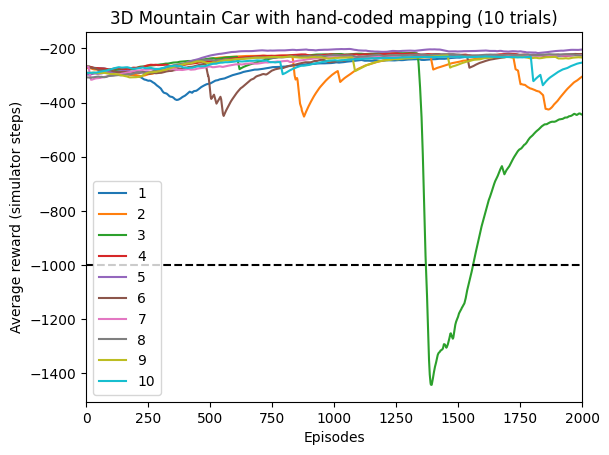

In [17]:
for trial in range(trials):
    plt.plot(all_output_X[trial], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 2000], [-1000, -1000], 'k--')
plt.xlim(0, 2000)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car with hand-coded mapping (10 trials)')
plt.legend()

In [8]:
MC3D_train_transfer_best_GAME_folder_path = os.path.join(config_data['output_path'], '01242023 Train MC3D With QValue Transfer Mapping 010111212 30 Trials')
MC3D_train_transfer_best_GAME_filepath = os.path.join(MC3D_train_transfer_best_GAME_folder_path, 'eval_3DMC_a0.5_l0.5_e0.01_nt8.csv')
trials = 30
df = pd.read_csv(MC3D_train_transfer_best_GAME_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, trials)
MC3D_transfer_best_GAME_ttt = []
for trial in range(trials):
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= -1000:
            MC3D_transfer_best_GAME_ttt.append(all_output_eps[trial][dat_idx])
            break

In [5]:
MC3D_transfer_best_GAME_ttt

[189,
 214,
 213,
 215,
 204,
 197,
 259,
 169,
 256,
 236,
 198,
 187,
 211,
 202,
 208,
 209,
 183,
 168,
 157,
 194,
 201,
 245,
 230,
 167,
 196,
 196,
 182,
 161,
 144,
 184]

In [6]:
np.mean(MC3D_transfer_best_GAME_ttt)

199.16666666666666

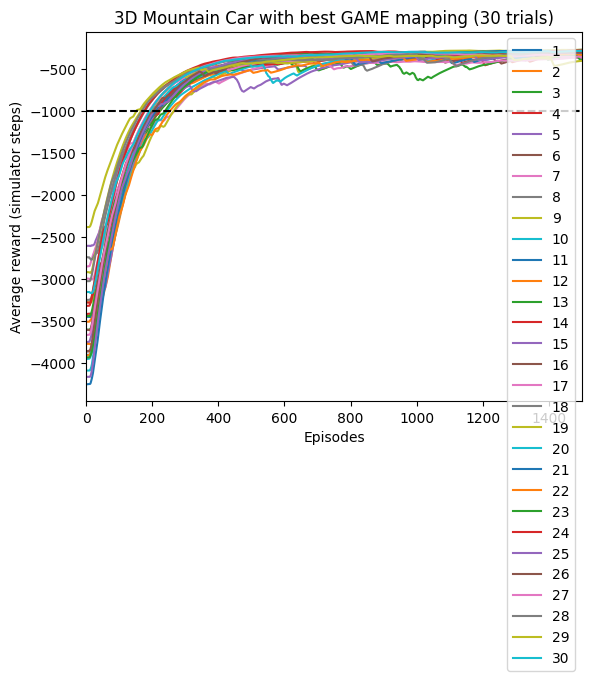

In [8]:
for trial in range(trials):
    plt.plot(all_output_X[trial], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 1500], [-1000, -1000], 'k--')
plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car with best GAME mapping (30 trials)')
plt.legend()

In [9]:
MC3D_train_transfer_worst_GAME_folder_path = os.path.join(config_data['output_path'], '12302022 Train MC3D With QValue Transfer Mapping 101022222')
MC3D_train_transfer_worst_GAME_filepath = os.path.join(MC3D_train_transfer_worst_GAME_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')
df = pd.read_csv(MC3D_train_transfer_worst_GAME_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, trials)
MC3D_transfer_worst_GAME_ttt = []
for trial in range(trials):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= -1000:
            MC3D_transfer_worst_GAME_ttt.append(all_output_eps[trial][dat_idx])
            converged = True
            break
    if not converged:
        MC3D_transfer_worst_GAME_ttt.append(2000)

In [26]:
MC3D_transfer_worst_GAME_ttt

[427, 473, 557, 626, 585, 736, 685, 459, 454, 384]

In [27]:
np.mean(MC3D_transfer_worst_GAME_ttt)

538.6

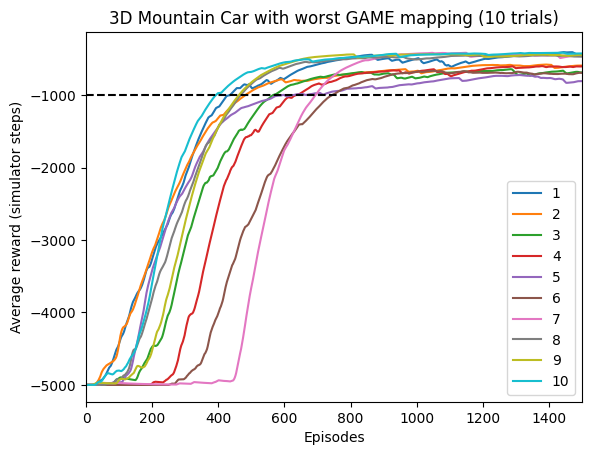

In [28]:
for trial in range(trials):
    plt.plot(all_output_X[trial], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 1500], [-1000, -1000], 'k--')
plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car with worst GAME mapping (10 trials)')
plt.legend()

In [15]:
MC3D_train_transfer_MASTER_folder_path = os.path.join(config_data['output_path'], '01092023 Train MC3D With QValue Transfer Mapping master')
MC3D_train_transfer_MASTER_filepath = os.path.join(MC3D_train_transfer_MASTER_folder_path, 'eval_3DMC_a0.5_l0.5_e0.01_nt8.csv')
df = pd.read_csv(MC3D_train_transfer_MASTER_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, trials)
MC3D_transfer_MASTER_ttt = []
for trial in range(trials):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= -1000:
            MC3D_transfer_MASTER_ttt.append(all_output_eps[trial][dat_idx])
            converged = True
            break
    if not converged:
        MC3D_transfer_MASTER_ttt.append(2000)

In [9]:
MC3D_transfer_MASTER_ttt

[197, 198, 204, 194, 196, 199, 213, 204, 198, 198]

In [10]:
np.mean(MC3D_transfer_MASTER_ttt)

200.1

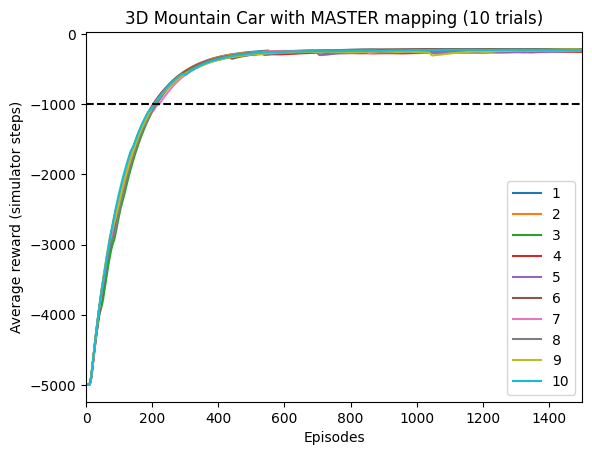

In [11]:
for trial in range(trials):
    plt.plot(all_output_X[trial], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 1500], [-1000, -1000], 'k--')
plt.xlim(0, 1500)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
plt.title('3D Mountain Car with MASTER mapping (10 trials)')
plt.legend()

##### Box plot

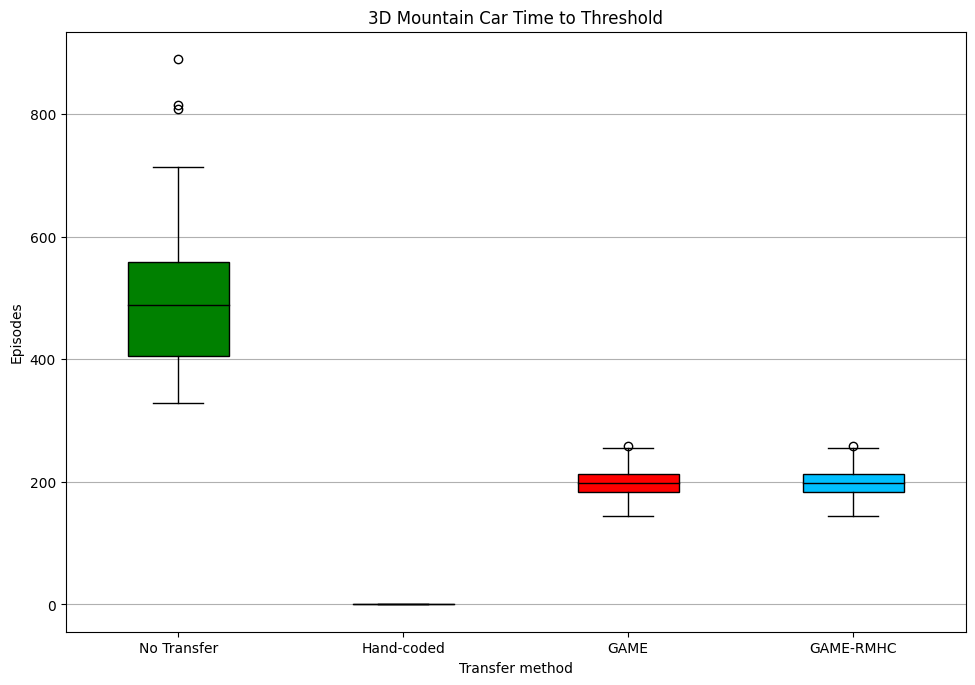

In [11]:
# data = [MC3D_no_transfer_ttt, MC3D_transfer_handcoded_ttt, MC3D_transfer_best_GAME_ttt, MC3D_transfer_worst_GAME_ttt, MC3D_transfer_MASTER_ttt]
# data_labels = ['No Transfer', 'Hand-coded', 'Best GAME', 'Worst GAME', 'MASTER']

data = [MC3D_no_transfer_ttt, MC3D_transfer_handcoded_ttt, MC3D_transfer_best_GAME_ttt, MC3D_transfer_best_GAME_ttt, MC3D_transfer_MASTER_ttt]
data_labels = ['No Transfer', 'Hand-coded', 'GAME', 'GAME-RMHC', 'MASTER']

fig = plt.figure(figsize =(9, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, vert=True, patch_artist=True, labels = data_labels, medianprops = dict(color='black'))
# plt.xticks([1, 2, 3, 4, 5], data_labels)

# fill with colors
colors = ['green', 'orange', 'red', 'deepskyblue', 'purple']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
 
# show plot
plt.xlabel('Transfer method')
plt.ylabel('Episodes')
plt.title('3D Mountain Car Time to Threshold')
plt.show()

##### Statistical tests

In [90]:
for i in range(len(data) - 1):
    for j in range(i + 1, len(data)):
        data1 = data[i]
        data2 = data[j]
        data_label1 = data_labels[i]
        data_label2 = data_labels[j]
        d = [samp1 - samp2 for samp1, samp2 in zip(data1, data2)]
        # res = wilcoxon(d)
        res = ranksums(data1, data2, alternative='two-sided')
        print("({}, {}) = ({}, {})".format(data_label1, data_label2, res.statistic, res.pvalue))

(No Transfer, Hand-coded) = (3.779644730092272, 0.00015705228423075119)
(No Transfer, GAME) = (3.023715784073818, 0.002496908915141548)
(No Transfer, GAME-RMHC) = (3.023715784073818, 0.002496908915141548)
(No Transfer, MASTER) = (2.721344205666436, 0.006501702373081825)
(Hand-coded, GAME) = (-3.779644730092272, 0.00015705228423075119)
(Hand-coded, GAME-RMHC) = (-3.779644730092272, 0.00015705228423075119)
(Hand-coded, MASTER) = (-3.779644730092272, 0.00015705228423075119)
(GAME, GAME-RMHC) = (0.0, 1.0)
(GAME, MASTER) = (-0.680336051416609, 0.49629170223109287)
(GAME-RMHC, MASTER) = (-0.680336051416609, 0.49629170223109287)


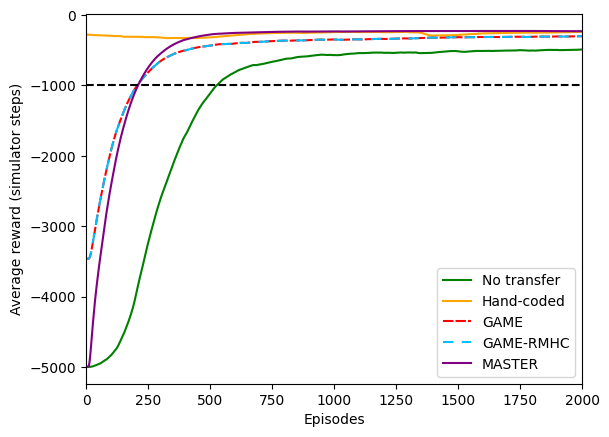

In [4]:
# MC3D_train_no_transfer_folder_path = os.path.join(config_data['data_path'], 'mountain_car')
MC3D_train_no_transfer_folder_path = os.path.join(config_data['output_path'], '01242023 Train MC3D No Transfer 30 Trials')
MC3D_train_no_transfer_filepath = os.path.join(MC3D_train_no_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0_nt8.csv')
df = pd.read_csv(MC3D_train_no_transfer_filepath, index_col=False)
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, 30)
plt.plot(avg_output_X, avg_output_Y, label = 'No transfer', c = 'green')

# experiments = ['12162022 Train MC3D With QValue Transfer Mapping 010110202', '11152022 Train MC3D With Transfer Mapping 010100000', 
# '12302022 Train MC3D With QValue Transfer Mapping 101022222', '11142022 Train MC3D With Transfer Mapping 0101master']
# experiment_name = ['Hand-coded mapping', 'Best GAME mapping', 'Worst GAME mapping', 'MASTER']
experiments = ['01242023 Train MC3D With QValue Transfer Mapping 010110202 30 Trials', '01242023 Train MC3D With QValue Transfer Mapping 010111212 30 Trials',
'01242023 Train MC3D With QValue Transfer Mapping 010111212 30 Trials', '01242023 Train MC3D With QValue Transfer Mapping master 30 Trials']
experiment_name = ['Hand-coded', 'GAME', 'GAME-RMHC', 'MASTER']
exp_color = ['orange', 'red', 'deepskyblue', 'purple']
for exp_idx, experiment in enumerate(experiments):
    MC3D_train_transfer_folder_path = os.path.join(config_data['output_path'], experiment)
    MC3D_train_transfer_filepath = os.path.join(MC3D_train_transfer_folder_path, 'eval_3DMC_a0.75_l0.99_e0.01_nt8.csv')
    if experiment == '01242023 Train MC3D With QValue Transfer Mapping 010111212 30 Trials':
        MC3D_train_transfer_filepath = os.path.join(MC3D_train_transfer_folder_path, 'eval_3DMC_a0.5_l0.5_e0.01_nt8.csv')
    elif experiment == '01242023 Train MC3D With QValue Transfer Mapping master 30 Trials':
        MC3D_train_transfer_filepath = os.path.join(MC3D_train_transfer_folder_path, 'eval_3DMC_a0.5_l0.5_e0.01_nt8.csv')
    df = pd.read_csv(MC3D_train_transfer_filepath, index_col=False)
    all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_MC(df, 30)
    if experiment_name[exp_idx] == 'GAME-RMHC':
        plt.plot(avg_output_X, avg_output_Y, label = '{}'.format(experiment_name[exp_idx]), linestyle='--', dashes=(5, 4), c = exp_color[exp_idx])
    elif experiment_name[exp_idx] == 'GAME':
        plt.plot(avg_output_X, avg_output_Y, label = '{}'.format(experiment_name[exp_idx]), linestyle='--', dashes=(5, 1), c = exp_color[exp_idx])        
    else:
        plt.plot(avg_output_X, avg_output_Y, label = '{}'.format(experiment_name[exp_idx]), c = exp_color[exp_idx])

plt.plot([0, 2000], [-1000, -1000], 'k--')

plt.xlim(0, 2000)
plt.xlabel('Episodes')
plt.ylabel('Average reward (simulator steps)')
# plt.title('3D Mountain Car Learning Curves')
plt.legend()

##### Keepaway

In [5]:
def plot_kwy(trials, win_size, alpha, coarse):
    output_X = []
    output_Y = []
    output_eps = []
    for trial in trials:
        trial_output_X, trial_output_Y, trial_output_eps = generate_keepaway_learning_curves(trial, win_size, alpha, coarse)
        output_X.append(trial_output_X)
        output_Y.append(trial_output_Y)
        output_eps.append(trial_output_eps)

    min_len = len(output_Y[0])
    min_len_idx = 0
    for y_idx in range(len(output_Y)):
        if len(output_Y[y_idx]) < min_len:
            min_len = len(output_Y[y_idx])
            min_len_idx = y_idx
    avg_output_X = output_X[min_len_idx][:min_len]
    avg_output_eps = output_eps[min_len_idx][:min_len]
    for y_idx in range(len(output_Y)):
        output_Y[y_idx] = copy.deepcopy(output_Y[y_idx][:min_len])
    output_Y = np.array(output_Y)
    avg_output_Y = output_Y.mean(axis=0)

    return output_X, output_Y, output_eps, avg_output_X, avg_output_Y, avg_output_eps

#### No transfer

In [28]:
kwy_no_transfer_paths = []
kwy_train_no_transfer_folder_path = os.path.join(config_data['logs_path'], '12282022 no transfer eval')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])
kwy_train_no_transfer_folder_path = os.path.join(config_data['logs_path'], '12282022 no transfer eval 2')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])

kwy_no_transfer_paths = kwy_no_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_no_transfer_paths, 1000, 0.01, 30)
# plt.plot(avg_output_X, avg_output_Y, label = 'No transfer')
keepaway_no_transfer_ttt = []
for trial in range(trials):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_no_transfer_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_no_transfer_ttt.append(-1)

In [4]:
keepaway_no_transfer_ttt

[22.05666666666667,
 34.28958333333333,
 32.33519444444445,
 25.283694444444446,
 32.78252777777778,
 26.74533333333333,
 28.159277777777778,
 33.88172222222222,
 25.119194444444446,
 23.71377777777778]

In [5]:
np.mean(keepaway_no_transfer_ttt)

28.43669722222222

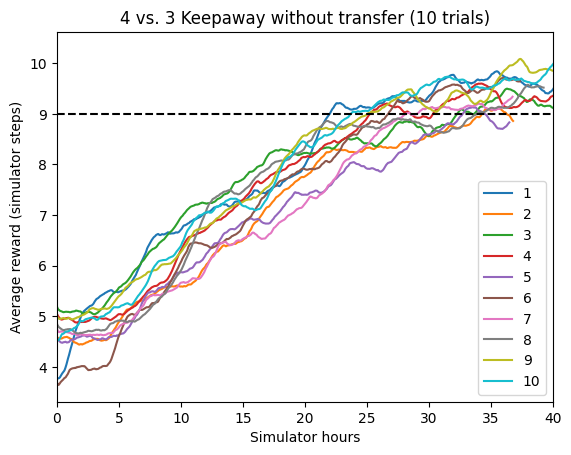

In [4]:
for trial in range(trials):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 40)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway without transfer (10 trials)')
plt.legend()

#### GAME

In [29]:
kwy_GAME_transfer_paths = []
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval 2')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:2] + kwy_GAME_transfer_paths[3:]
# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_GAME_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_GAME_ttt = []
for trial in range(len(kwy_GAME_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_GAME_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_GAME_ttt.append(-1)

In [29]:
keepaway_transfer_GAME_ttt

[11.62211111111111,
 19.186777777777777,
 16.49336111111111,
 18.584750000000003,
 16.158944444444444,
 19.353388888888887,
 8.925027777777778,
 17.466694444444443,
 12.076472222222224,
 16.061666666666667]

In [30]:
np.mean(keepaway_transfer_GAME_ttt)

15.592919444444444

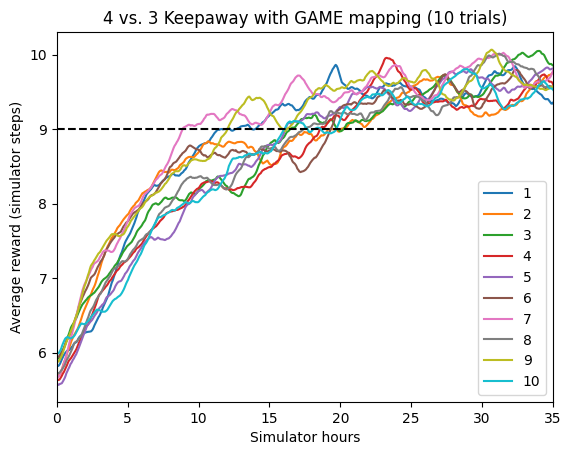

In [50]:
for trial in range(len(kwy_GAME_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 35], [9, 9], 'k--')
plt.xlim(0, 35)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with GAME mapping (10 trials)')
plt.legend()

#### GAME-RMHC

In [30]:
kwy_GAMERMHC_transfer_paths = []
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval 2')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_paths = kwy_GAMERMHC_transfer_paths[1:9] + kwy_GAMERMHC_transfer_paths[10:]

# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_GAMERMHC_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_GAMERMHC_ttt = []
for trial in range(len(kwy_GAMERMHC_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_GAMERMHC_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_GAMERMHC_ttt.append(35)
        # pass

In [64]:
keepaway_transfer_GAMERMHC_ttt

[14.237138888888888,
 19.18155555555556,
 15.465361111111111,
 15.649055555555556,
 16.189305555555556,
 19.19752777777778,
 17.620916666666666,
 19.90286111111111,
 16.50386111111111,
 18.990388888888887]

In [65]:
np.mean(keepaway_transfer_GAMERMHC_ttt)

17.293797222222224

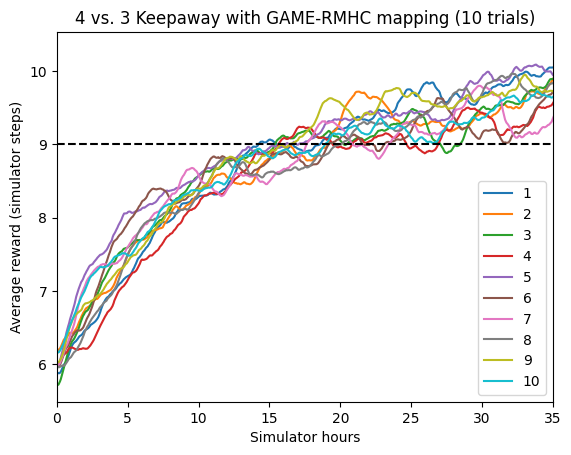

In [66]:
for trial in range(len(kwy_GAMERMHC_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 35)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with GAME-RMHC mapping (10 trials)')
plt.legend()

#### Hand-coded

In [31]:
kwy_handcoded_transfer_paths = []
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)])
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval 2')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)])  
# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_handcoded_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_hand_coded_ttt = []
for trial in range(len(kwy_handcoded_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_hand_coded_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_hand_coded_ttt.append(-1)

In [58]:
keepaway_transfer_hand_coded_ttt

[5.208388888888889,
 7.608805555555556,
 7.925444444444444,
 11.20425,
 6.5971111111111105,
 6.647444444444444,
 7.975666666666667,
 6.141861111111111,
 6.638277777777778,
 8.767138888888889]

In [59]:
np.mean(keepaway_transfer_hand_coded_ttt)

7.471438888888889

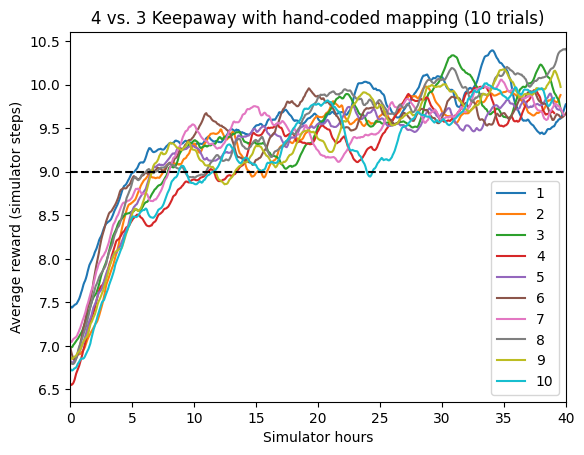

In [10]:
for trial in range(len(kwy_handcoded_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 40)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with hand-coded mapping (10 trials)')
plt.legend()

#### GAME-RMHC with hand-coded action mapping

In [22]:
kwy_GAMERMHC_handcoded_action_mapping_transfer_paths = []
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer GAME-RMHC handcoded action map eval')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '12312022 transfer GAME-RMHC handcoded action map eval 2')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])

# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_GAMERMHC_handcoded_action_mapping_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_GAMERMHC_handcoded_action_mapping_ttt = []
for trial in range(len(kwy_GAMERMHC_handcoded_action_mapping_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_GAMERMHC_handcoded_action_mapping_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_GAMERMHC_handcoded_action_mapping_ttt.append(35)
        # pass

In [15]:
keepaway_transfer_GAMERMHC_handcoded_action_mapping_ttt

[13.411777777777779,
 9.737833333333333,
 10.742722222222223,
 10.495333333333333,
 12.096777777777778,
 9.081472222222223,
 14.874777777777776,
 13.212305555555556,
 11.641388888888889,
 11.555916666666667]

In [16]:
np.mean(keepaway_transfer_GAMERMHC_handcoded_action_mapping_ttt)

11.685030555555553

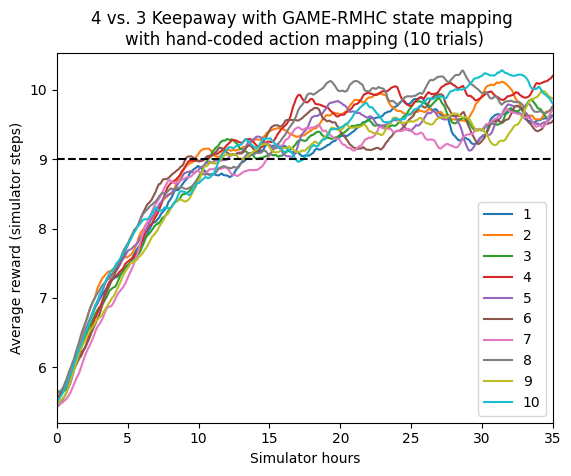

In [18]:
for trial in range(len(kwy_GAMERMHC_handcoded_action_mapping_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 35)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with GAME-RMHC state mapping \nwith hand-coded action mapping (10 trials)')
plt.legend()

#### Reverse hand-coded mapping

In [23]:
kwy_reverse_handcoded_transfer_paths = []
kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval')
for file in os.listdir(kwy_reverse_handcoded_folder_path):
    if file.endswith('kwy'):
        kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval 2')
for file in os.listdir(kwy_reverse_handcoded_folder_path):
    if file.endswith('kwy'):
        kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
kwy_reverse_handcoded_transfer_paths = kwy_reverse_handcoded_transfer_paths[:10]
# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_reverse_handcoded_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_reverse_handcoded_ttt = []
for trial in range(len(kwy_reverse_handcoded_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_reverse_handcoded_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_reverse_handcoded_ttt.append(35)
        # pass

In [14]:
keepaway_transfer_reverse_handcoded_ttt

[12.038499999999999,
 8.497083333333334,
 8.231277777777777,
 9.735666666666667,
 10.182333333333334,
 9.634888888888888,
 10.248555555555557,
 12.697388888888888,
 13.616166666666667,
 9.133638888888889]

In [15]:
np.mean(keepaway_transfer_reverse_handcoded_ttt)

10.40155

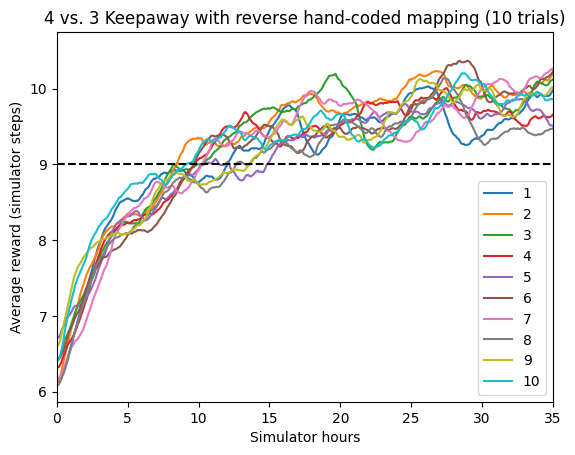

In [16]:
for trial in range(len(kwy_reverse_handcoded_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 35)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with reverse hand-coded mapping (10 trials)')
plt.legend()

#### Distance-to-angle mapping

In [27]:
kwy_disttoangle_transfer_paths = []
kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval')
for file in os.listdir(kwy_disttoangle_folder_path):
    if file.endswith('kwy'):
        kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval 2')
for file in os.listdir(kwy_disttoangle_folder_path):
    if file.endswith('kwy'):
        kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
kwy_disttoangle_transfer_paths = kwy_disttoangle_transfer_paths[:10]
# kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
all_output_X, all_output_Y, all_output_eps, avg_output_X, avg_output_Y, avg_output_eps = plot_kwy(kwy_disttoangle_transfer_paths, 1000, 0.01, 30)
keepaway_transfer_disttoangle_ttt = []
for trial in range(len(kwy_disttoangle_transfer_paths)):
    converged = False
    for dat_idx, dat in enumerate(all_output_Y[trial]):
        if dat >= 9:
            keepaway_transfer_disttoangle_ttt.append(all_output_X[trial][dat_idx])
            converged = True
            break
    if not converged:
        keepaway_transfer_disttoangle_ttt.append(35)
        # pass

In [28]:
keepaway_transfer_disttoangle_ttt

[8.590083333333332,
 13.048194444444444,
 12.212694444444443,
 12.4125,
 8.77525,
 14.7355,
 8.871666666666666,
 12.5425,
 13.924805555555556,
 15.139222222222221]

In [30]:
np.mean(keepaway_transfer_disttoangle_ttt)

12.025241666666664

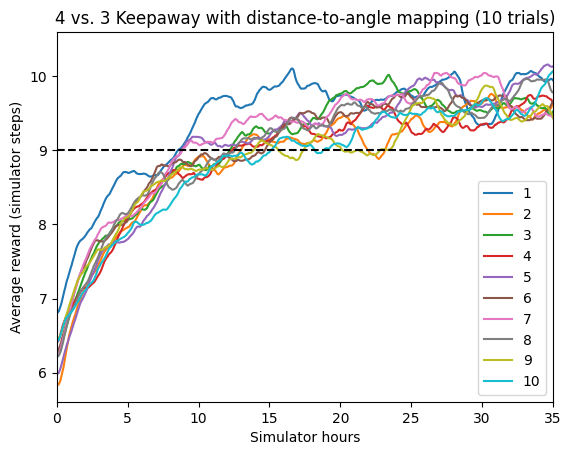

In [36]:
for trial in range(len(kwy_disttoangle_transfer_paths)):
    # print(len(all_output_X[trial][:len(all_output_Y[trial])]), len(all_output_Y[trial]))
    plt.plot(all_output_X[trial][:len(all_output_Y[trial])], all_output_Y[trial], label = '{}'.format(trial + 1))

plt.plot([0, 40], [9, 9], 'k--')
plt.xlim(0, 35)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (simulator steps)')
plt.title('4 vs. 3 Keepaway with distance-to-angle mapping (10 trials)')
plt.legend()

##### Box plot

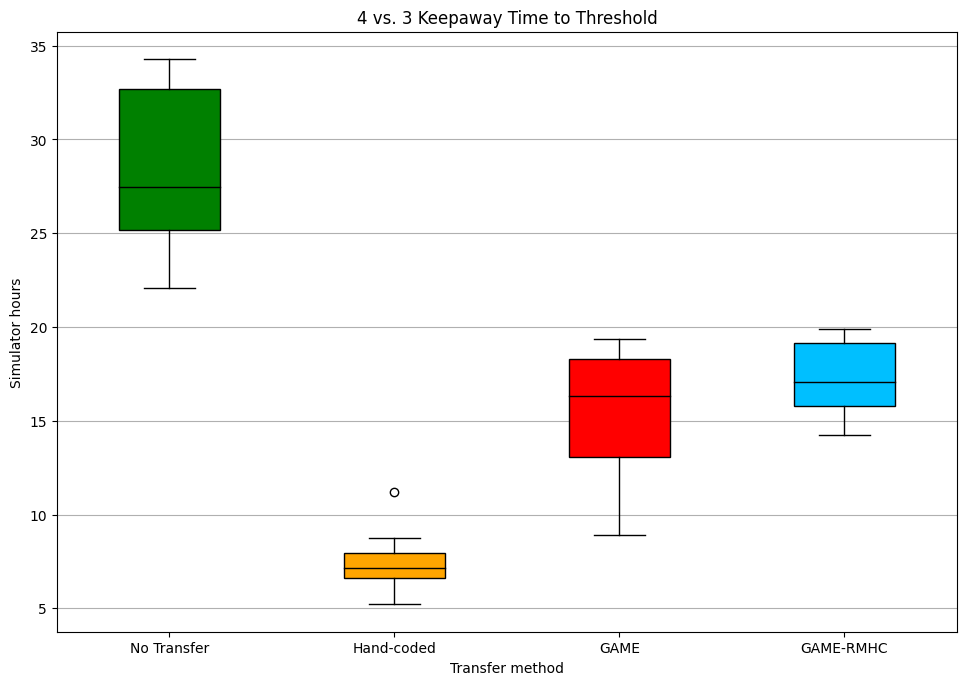

In [46]:
# data = [keepaway_no_transfer_ttt, keepaway_transfer_hand_coded_ttt, keepaway_transfer_GAME_ttt, keepaway_transfer_GAMERMHC_ttt]
# data_labels = ['No Transfer', 'Hand-coded', 'GAME', 'GAME-RMHC']

data = [keepaway_no_transfer_ttt, keepaway_transfer_hand_coded_ttt, keepaway_transfer_GAME_ttt, keepaway_transfer_GAMERMHC_ttt]
data_labels = ['No Transfer', 'Hand-coded', 'GAME', 'GAME-RMHC']

fig = plt.figure(figsize =(9, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, vert=True, patch_artist=True, labels = data_labels, medianprops = dict(c = 'black'))
# plt.xticks([1, 2, 3, 4, 5], data_labels)

# fill with colors
colors = ['green', 'orange', 'red', 'deepskyblue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines
ax.yaxis.grid(True)
 
# show plot
plt.xlabel('Transfer method')
plt.ylabel('Simulator hours')
plt.title('4 vs. 3 Keepaway Time to Threshold')
plt.show()

##### Statistical tests

In [70]:
for i in range(len(data) - 1):
    for j in range(i + 1, len(data)):
        data1 = data[i]
        data2 = data[j]
        data_label1 = data_labels[i]
        data_label2 = data_labels[j]
        d = [samp1 - samp2 for samp1, samp2 in zip(data1, data2)]
        srs_res = wilcoxon(d)
        rs_res = ranksums(data1, data2, alternative = 'two-sided')
        print("({}, {}), Rank sum = ({}, {}), Signed rank sum = ({}, {})".format(data_label1, data_label2, rs_res.statistic, rs_res.pvalue, srs_res.statistic, srs_res.pvalue))

(No Transfer, Hand-coded), Rank sum = (3.779644730092272, 0.00015705228423075119), Signed rank sum = (0.0, 0.001953125)
(No Transfer, GAME), Rank sum = (3.779644730092272, 0.00015705228423075119), Signed rank sum = (0.0, 0.001953125)
(No Transfer, GAME-RMHC), Rank sum = (3.779644730092272, 0.00015705228423075119), Signed rank sum = (0.0, 0.001953125)
(Hand-coded, GAME), Rank sum = (-3.704051835490427, 0.00021218287122257823), Signed rank sum = (0.0, 0.001953125)
(Hand-coded, GAME-RMHC), Rank sum = (-3.779644730092272, 0.00015705228423075119), Signed rank sum = (0.0, 0.001953125)
(GAME, GAME-RMHC), Rank sum = (-0.9071147352221454, 0.3643461266335529), Signed rank sum = (16.0, 0.275390625)


#### Plot average agent learning in Keepaway

In [6]:
def generate_keepaway_learning_curves(kwy_paths:list, window_size:int=900, alpha:float=0.01, coarse:int=30) -> tuple:
    """
    Description:
        Graphs keepaway learning curves using .kwy log files.

    Arguments:
        kwy_paths: a list of paths to the .kwy files. Used to splice together separate .kwy files.
        window_size: the size of the sliding window for averaging the number of steps.
        alpha: alpha value used in the low-pass filter to smooth the curve.
        coarse: every coarse-th point gets outputted to cut down on file size.

    Return:
        (tuple) a list of the training time and a list of the average episode durations.
    """
    # init variables
    ep_dur_sum = 0 # Window sum of episode durations
    start = 0
    q = np.zeros(shape = (1, window_size))
    output_X = []
    output_Y = []
    output_eps = []

    # read the first kwy file. There might be more that results from interrupted training
    initial_kwy_file_path = kwy_paths[0]

    # read the first window_size entries
    with open(initial_kwy_file_path, 'r') as f:
        # ignore header
        line = f.readline()
        while line[0] == '#':
            line = f.readline()
        # fill window
        for i in range(len(q[0])):
            if line: # while we still have non-empty lines
                parsed_line = line.split()
                ep_dur = int(parsed_line[3])
                q[0][i] = ep_dur
                ep_dur_sum += q[0][i]
                line = f.readline()
            else:
                raise ValueError("Not enough data to fill window.")

        # read the rest of the data
        i = 0
        ep = 0
        ccount = 0
        prev = ep_dur_sum
        while line:
            if ccount % coarse == 0:
                output_X.append(start / 10.0 / 3600)
                output_Y.append(prev / 10.0 / window_size)
                output_eps.append(ep)
            
            ep_dur_sum -= q[0][i]
            parsed_line = line.split()
            ep_dur = int(parsed_line[3])
            q[0][i] = ep_dur
            ep_dur_sum += q[0][i]
            start += q[0][i]

            prev = (1 - alpha) * prev + alpha * ep_dur_sum
            i = (i + 1) % window_size
            ccount += 1
            line = f.readline()

            ep += 1
    
    # continue to parse keepaway files if more are supplied. Appends this data to the previously computed data
    if len(kwy_paths) > 1:
        for kwy_path_idx in range(1, len(kwy_paths)):
            with open(kwy_paths[kwy_path_idx], 'r') as f:
                # ignore header
                line = f.readline()
                while line[0] == '#':
                    line = f.readline()

                # read the rest of the data
                while line:
                    if ccount % coarse == 0:
                        output_X.append(start / 10.0 / 3600)
                        output_Y.append(prev / 10.0 / window_size)
                        output_eps.append(ep)
                    
                    ep_dur_sum -= q[0][i]
                    parsed_line = line.split()
                    ep_dur = int(parsed_line[3])
                    q[0][i] = ep_dur
                    ep_dur_sum += q[0][i]
                    start += q[0][i]

                    prev = (1 - alpha) * prev + alpha * ep_dur_sum
                    i = (i + 1) % window_size
                    ccount += 1
                    line = f.readline()
                    
                    ep += 1
    
    # return the parsed kwy data
    return output_X, output_Y, output_eps

import copy
def plot_kwy(trials, win_size, alpha, coarse):
    output_X = []
    output_Y = []
    output_eps = []
    for trial in trials:
        trial_output_X, trial_output_Y, trial_output_eps = generate_keepaway_learning_curves(trial, win_size, alpha, coarse)
        output_X.append(trial_output_X)
        output_Y.append(trial_output_Y)
        output_eps.append(trial_output_eps)

    min_len = len(output_Y[0])
    min_len_idx = 0
    for y_idx in range(len(output_Y)):
        if len(output_Y[y_idx]) < min_len:
            min_len = len(output_Y[y_idx])
            min_len_idx = y_idx
    avg_output_X = output_X[min_len_idx][:min_len]
    avg_output_eps = output_eps[min_len_idx][:min_len]
    for y_idx in range(len(output_Y)):
        output_Y[y_idx] = copy.deepcopy(output_Y[y_idx][:min_len])
    output_Y = np.array(output_Y)
    avg_output_Y = output_Y.mean(axis=0)

    return avg_output_X, avg_output_Y, avg_output_eps

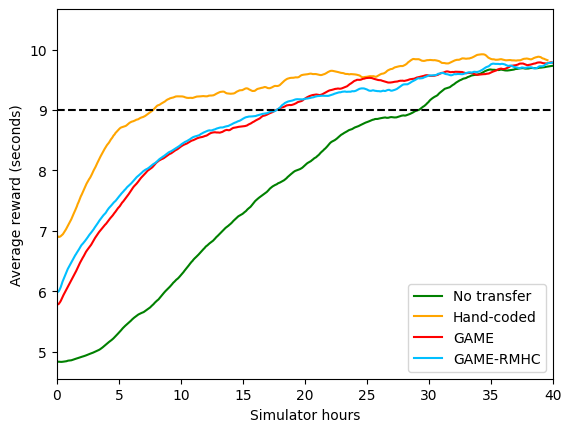

In [7]:
kwy_no_transfer_paths = []
kwy_train_no_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'no_transfer_keepaway_4v3_p1', 'logs')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])
kwy_train_no_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'no_transfer_keepaway_4v3_p2', 'logs')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])
kwy_train_no_transfer_folder_path = os.path.join(config_data['output_path'], '011823 4v3 no transfer 20 trials')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])

# kwy_no_transfer_paths = kwy_no_transfer_paths[:trials]
output_X, output_Y, output_eps = plot_kwy(kwy_no_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'No transfer', c = 'green')

kwy_handcoded_transfer_paths = []
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)])
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval 2')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)]) 
output_X, output_Y, output_eps = plot_kwy(kwy_handcoded_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'Hand-coded', c = 'orange')

kwy_GAME_transfer_paths = []
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval 2')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:2] + kwy_GAME_transfer_paths[3:]
output_X, output_Y, output_eps = plot_kwy(kwy_GAME_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'GAME', c = 'red')

kwy_GAMERMHC_transfer_paths = []
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval 2')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_paths = kwy_GAMERMHC_transfer_paths[1:9] + kwy_GAMERMHC_transfer_paths[10:]
output_X, output_Y, output_eps = plot_kwy(kwy_GAMERMHC_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'GAME-RMHC', c = 'deepskyblue')

# kwy_bad_transfer_paths = []
# kwy_bad_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'GAME-RMHC results')
# for file in os.listdir(kwy_bad_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_bad_transfer_paths.append([os.path.join(kwy_bad_transfer_folder_path, file)])
# kwy_bad_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'GAME-RMHC results')
# for file in os.listdir(kwy_bad_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_bad_transfer_paths.append([os.path.join(kwy_bad_transfer_folder_path, file)])
# # kwy_GAMERMHC_transfer_paths = kwy_GAMERMHC_transfer_paths[1:9] + kwy_GAMERMHC_transfer_paths[10:]
# output_X, output_Y, output_eps = plot_kwy(kwy_bad_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Random initial weights', c = 'tan')

# kwy_GAMERMHC_handcoded_action_mapping_transfer_paths = []
# kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer GAME-RMHC handcoded action map eval')
# for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
# kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '12312022 transfer GAME-RMHC handcoded action map eval 2')
# for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
# output_X, output_Y, output_eps = plot_kwy(kwy_GAMERMHC_handcoded_action_mapping_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'GAME-RMHC \nwith hand-coded action mapping')

# kwy_reverse_handcoded_transfer_paths = []
# kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval')
# for file in os.listdir(kwy_reverse_handcoded_folder_path):
#     if file.endswith('kwy'):
#         kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
# kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval 2')
# for file in os.listdir(kwy_reverse_handcoded_folder_path):
#     if file.endswith('kwy'):
#         kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
# kwy_reverse_handcoded_transfer_paths = kwy_reverse_handcoded_transfer_paths[:10]
# output_X, output_Y, output_eps = plot_kwy(kwy_reverse_handcoded_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Reverse hand-coded')

# kwy_disttoangle_transfer_paths = []
# kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval')
# for file in os.listdir(kwy_disttoangle_folder_path):
#     if file.endswith('kwy'):
#         kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
# kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval 2')
# for file in os.listdir(kwy_disttoangle_folder_path):
#     if file.endswith('kwy'):
#         kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
# kwy_disttoangle_transfer_paths = kwy_disttoangle_transfer_paths[:10]
# # kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
# output_X, output_Y, output_eps = plot_kwy(kwy_disttoangle_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Distance-to-angle')

plt.plot([0, 40], [9, 9], 'k--')

plt.xlim(0, 40)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (seconds)')
# plt.title('4 vs. 3 Keepaway Learning Curves')
plt.legend()

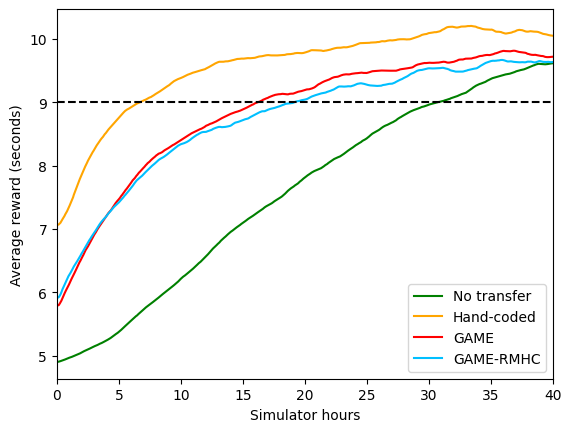

In [7]:
kwy_no_transfer_paths = []
kwy_train_no_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'no_transfer_keepaway_4v3_p1', 'logs')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])
kwy_train_no_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'no_transfer_keepaway_4v3_p2', 'logs')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])
kwy_train_no_transfer_folder_path = os.path.join(config_data['logs_path'], '011823 4v3 no transfer 20 trials')
for file in os.listdir(kwy_train_no_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_no_transfer_paths.append([os.path.join(kwy_train_no_transfer_folder_path, file)])

kwy_no_transfer_paths = kwy_no_transfer_paths[:30]
output_X, output_Y, output_eps = plot_kwy(kwy_no_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'No transfer', c = 'green')

kwy_handcoded_transfer_paths = []
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)])
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '12292022 transfer hand coded eval 2')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)]) 
kwy_handcoded_transfer_folder_path = os.path.join(config_data['logs_path'], '012123 4v3 handcoded 20 trials')
for file in os.listdir(kwy_handcoded_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_handcoded_transfer_paths.append([os.path.join(kwy_handcoded_transfer_folder_path, file)]) 
output_X, output_Y, output_eps = plot_kwy(kwy_handcoded_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'Hand-coded', c = 'orange')

kwy_GAME_transfer_paths = []
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME eval 2')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:2] + kwy_GAME_transfer_paths[3:]
kwy_GAME_transfer_folder_path = os.path.join(config_data['logs_path'], '01242023 GAME eval 20 trials')
for file in os.listdir(kwy_GAME_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAME_transfer_paths.append([os.path.join(kwy_GAME_transfer_folder_path, file)])
output_X, output_Y, output_eps = plot_kwy(kwy_GAME_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'GAME', c = 'red')

kwy_GAMERMHC_transfer_paths = []
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01072023 GAME-RMHC eval 2')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
kwy_GAMERMHC_transfer_paths = kwy_GAMERMHC_transfer_paths[1:9] + kwy_GAMERMHC_transfer_paths[10:]
kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01252023 GAME-RMHC eval 20 trials')
for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
    if file.endswith('kwy'):
        kwy_GAMERMHC_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
output_X, output_Y, output_eps = plot_kwy(kwy_GAMERMHC_transfer_paths, 1000, 0.01, 30)
plt.plot(output_X, output_Y, label = 'GAME-RMHC', c = 'deepskyblue')

# kwy_bad_transfer_paths = []
# kwy_bad_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'GAME-RMHC results')
# for file in os.listdir(kwy_bad_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_bad_transfer_paths.append([os.path.join(kwy_bad_transfer_folder_path, file)])
# kwy_bad_transfer_folder_path = os.path.join(config_data['output_path'], 'Final Presentation', 'GAME-RMHC results')
# for file in os.listdir(kwy_bad_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_bad_transfer_paths.append([os.path.join(kwy_bad_transfer_folder_path, file)])
# # kwy_GAMERMHC_transfer_paths = kwy_GAMERMHC_transfer_paths[1:9] + kwy_GAMERMHC_transfer_paths[10:]
# output_X, output_Y, output_eps = plot_kwy(kwy_bad_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Random initial weights', c = 'tan')

# kwy_GAMERMHC_handcoded_action_mapping_transfer_paths = []
# kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer GAME-RMHC handcoded action map eval')
# for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
# kwy_GAMERMHC_transfer_folder_path = os.path.join(config_data['logs_path'], '12312022 transfer GAME-RMHC handcoded action map eval 2')
# for file in os.listdir(kwy_GAMERMHC_transfer_folder_path):
#     if file.endswith('kwy'):
#         kwy_GAMERMHC_handcoded_action_mapping_transfer_paths.append([os.path.join(kwy_GAMERMHC_transfer_folder_path, file)])
# output_X, output_Y, output_eps = plot_kwy(kwy_GAMERMHC_handcoded_action_mapping_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'GAME-RMHC \nwith hand-coded action mapping')

# kwy_reverse_handcoded_transfer_paths = []
# kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval')
# for file in os.listdir(kwy_reverse_handcoded_folder_path):
#     if file.endswith('kwy'):
#         kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
# kwy_reverse_handcoded_folder_path = os.path.join(config_data['logs_path'], '01012023 transfer reverse handcoded eval 2')
# for file in os.listdir(kwy_reverse_handcoded_folder_path):
#     if file.endswith('kwy'):
#         kwy_reverse_handcoded_transfer_paths.append([os.path.join(kwy_reverse_handcoded_folder_path, file)])
# kwy_reverse_handcoded_transfer_paths = kwy_reverse_handcoded_transfer_paths[:10]
# output_X, output_Y, output_eps = plot_kwy(kwy_reverse_handcoded_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Reverse hand-coded')

# kwy_disttoangle_transfer_paths = []
# kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval')
# for file in os.listdir(kwy_disttoangle_folder_path):
#     if file.endswith('kwy'):
#         kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
# kwy_disttoangle_folder_path = os.path.join(config_data['logs_path'], '01022023 transfer dist to angle eval 2')
# for file in os.listdir(kwy_disttoangle_folder_path):
#     if file.endswith('kwy'):
#         kwy_disttoangle_transfer_paths.append([os.path.join(kwy_disttoangle_folder_path, file)])
# kwy_disttoangle_transfer_paths = kwy_disttoangle_transfer_paths[:10]
# # kwy_GAME_transfer_paths = kwy_GAME_transfer_paths[:trials]
# output_X, output_Y, output_eps = plot_kwy(kwy_disttoangle_transfer_paths, 1000, 0.01, 30)
# plt.plot(output_X, output_Y, label = 'Distance-to-angle')

plt.plot([0, 40], [9, 9], 'k--')

plt.xlim(0, 40)
plt.xlabel('Simulator hours')
plt.ylabel('Average reward (seconds)')
# plt.title('4 vs. 3 Keepaway Learning Curves')
plt.legend()

In [8]:
len(kwy_no_transfer_paths)

30